In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [2]:
files = {
    'att0': 'logs/tsp50_att0/log.txt',  # '(Baseline) Bresson TSP Transformer'
    'att1': 'logs/tsp50_att1_seg25/log.txt',  # 'TSP Transformer with XL Decoder'
}

In [3]:
n_epoch_count = 40
# start_lines = [20, 22, 21]
metric_names_train = ['t_batch', 't_forward', 't_backward', 'L_train', 'L_base']
metric_names_eval = ['t_eval_20', 't_step', 'L_train', 'L_base']
metric_name_epoch = ['t_epoch']
metric_name_update = ['L_train']
# result_dict = {'van': [], 'xl': [], 'xlr': []}
res_dict = {'att0': {
    'train': [], 'eval': [], 'epoch': [], 'update': []
    },
    'att1':{
        'train': [], 'eval': [], 'epoch': [], 'update': []
    }
}
for file, fname in files.items():
    fname = glob(fname)[0]
    with open(fname, 'r') as f:
        lines = f.readlines()
        print(f'{file}:{fname}')

        # for line in lines:
        # for i in range(len(lines)):
        i = 0
        if file == 'att0':
            i = 1070
        while i < len(lines):
            line = lines[i]
            if line[:8] == 'Epoch 39':
                break
            if line[:9] == 'Train Log':
                line = lines[i] + lines[i+1]
                metric_values = re.findall('[0-9]+\.[0-9]+', line)
                metric_values = metric_values[:5]
                metric_dict = {k:v for k, v in zip(metric_names_train, metric_values)}
                res_dict[file]['train'].append(metric_dict)
                i += 1
            elif line[:8] == 'Eval Log':
                metric_values = re.findall('[0-9]+\.[0-9]+', line)
                metric_values = metric_values[:4]
                metric_dict = {k:v for k, v in zip(metric_names_eval, metric_values)}
                res_dict[file]['eval'].append(metric_dict)
            elif line[:5] == 'Epoch':
                metric_value = re.findall('[0-9]+\.[0-9]+', line)
                res_dict[file]['epoch'].append(metric_value[0])
            elif line[:8] == 'Baseline':
                metric_value = re.findall('[0-9]+\.[0-9]+', line)
                res_dict[file]['update'].append(metric_value[0])
            i += 1

att0:logs/tsp50_att0/log.txt
att1:logs/tsp50_att1_seg25/log.txt


In [4]:
df_at0_train = pd.DataFrame.from_dict(res_dict['att0']['train']).astype(float)
df_at0_eval = pd.DataFrame.from_dict(res_dict['att0']['eval']).astype(float)
df_at1_train = pd.DataFrame.from_dict(res_dict['att1']['train']).astype(float)
df_at1_eval = pd.DataFrame.from_dict(res_dict['att1']['eval']).astype(float)

# Train Log

In [5]:
print('Att0')
print(df_at0_train.describe())
print('Att1')
print(df_at1_train.describe())

Att0
          t_batch   t_forward  t_backward     L_train      L_base
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean     0.908150    0.298215    0.372215    6.090241    6.254394
std      0.026214    0.008991    0.004918    0.458906    1.643666
min      0.614000    0.224000    0.333000    5.943220    5.920120
25%      0.905750    0.296000    0.370000    5.955813    5.931862
50%      0.911000    0.300000    0.372000    5.974295    5.942170
75%      0.915250    0.303000    0.374000    6.014255    5.978775
max      0.949000    0.312000    0.391000    9.436860   16.434490
Att1
          t_batch   t_forward  t_backward     L_train      L_base
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean     0.920305    0.309200    0.386720    6.084566    6.247242
std      0.095489    0.004129    0.004415    0.452595    1.652533
min      0.860000    0.281000    0.382000    5.942860    5.918950
25%      0.907000    0.307000    0.384000    5.953320    5.929780


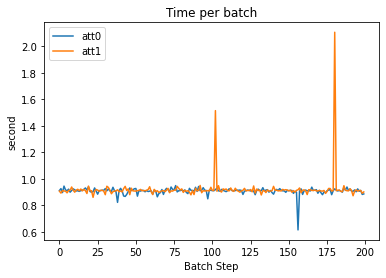

In [6]:
df_at0_train['t_batch'].plot(label='att0')
df_at1_train['t_batch'].plot(label='att1')
# plt.yscale('log')
plt.legend()
plt.title('Time per batch')
plt.xlabel('Batch Step')
plt.ylabel('second')
plt.show()

39 39


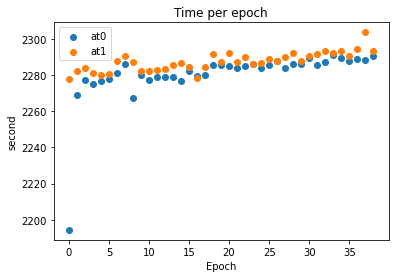

Mean Epoch times
att0 2280.5025897435894
att1 2287.500051282052


In [7]:
at0_train_epoch = np.array(res_dict['att0']['epoch'], dtype='float')
at1_train_epoch = np.array(res_dict['att1']['epoch'], dtype='float')
print(len(at0_train_epoch), len(at1_train_epoch))
plt.scatter(np.arange(39), at0_train_epoch, label='at0')
plt.scatter(np.arange(39), at1_train_epoch, label='at1')
plt.legend()
plt.xlabel('Epoch')
# plt.yscale('log')
plt.title('Time per epoch')
plt.ylabel('second')
plt.show()
print('Mean Epoch times')
print('att0',np.mean(at0_train_epoch))
print('att1',np.mean(at1_train_epoch))

24 20


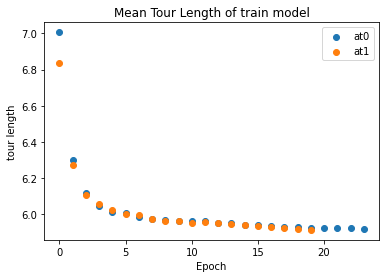

6.019949162006379
6.026632640361786


In [8]:
at0_train_update = np.array(res_dict['att0']['update'], dtype='float')
at1_train_update = np.array(res_dict['att1']['update'], dtype='float')
print(len(at0_train_update), len(at1_train_update))
plt.scatter(np.arange(24), at0_train_update, label='at0')
plt.scatter(np.arange(20), at1_train_update, label='at1')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('tour length')
# plt.yscale('log')
plt.title('Mean Tour Length of train model')
plt.show()
print(np.mean(at0_train_update))
print(np.mean(at1_train_update))

5.944358000000001
5.944041


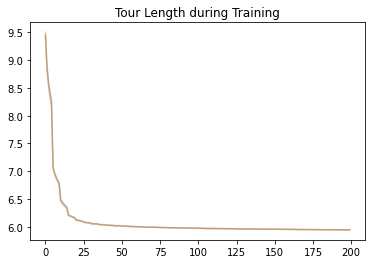

In [9]:
df_at0_train['L_train'].plot(label='at0', alpha=0.5)
print(df_at0_train['L_train'][-10:].mean())
df_at1_train['L_train'].plot(label='at1', alpha=0.5)
print(df_at1_train['L_train'][-10:].mean())
plt.title('Tour Length during Training')
plt.show()

# Eval Log

In [10]:
print('Att0')
print(df_at0_eval.describe())
print('Att1')
print(df_at1_eval.describe())

Att0
       t_eval_20     t_step    L_train     L_base
count  40.000000  40.000000  40.000000  40.000000
mean    7.651750   0.382550   5.993032   6.254604
std     0.265786   0.013183   0.177708   1.660047
min     6.837000   0.342000   5.916410   5.919170
25%     7.535750   0.377000   5.931893   5.931765
50%     7.666500   0.383500   5.944200   5.943135
75%     7.859500   0.393250   5.974428   5.976945
max     8.229000   0.411000   7.006720  16.430790
Att1
       t_eval_20     t_step    L_train     L_base
count  40.000000  40.000000  40.000000  40.000000
mean    7.772425   0.388575   5.984500   6.247040
std     0.443491   0.022219   0.152493   1.668045
min     7.027000   0.351000   5.912270   5.912920
25%     7.367750   0.368000   5.928160   5.928310
50%     7.720000   0.386000   5.941905   5.941815
75%     8.194250   0.410000   5.967595   5.973168
max     8.666000   0.433000   6.838780  16.490980


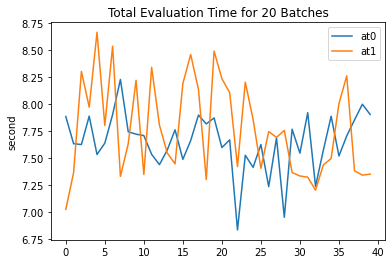

In [11]:
df_at0_eval['t_eval_20'].plot(label='at0')
df_at1_eval['t_eval_20'].plot(label='at1')
plt.legend()
plt.title('Total Evaluation Time for 20 Batches')
plt.ylabel('second')
plt.show()

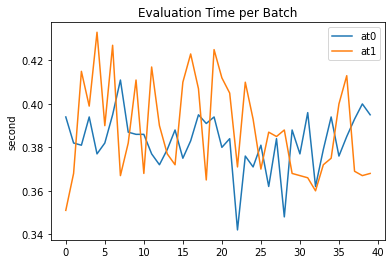

In [12]:
df_at0_eval['t_step'].plot(label='at0')
df_at1_eval['t_step'].plot(label='at1')
plt.title('Evaluation Time per Batch')
plt.ylabel('second')
plt.legend()
plt.show()

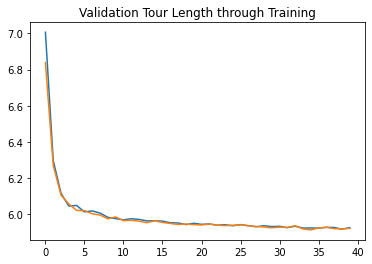

In [13]:
df_at0_eval['L_train'].plot()
df_at1_eval['L_train'].plot()
plt.title('Validation Tour Length through Training')
plt.show()